1. 데이터 전처리 과정
2. 최종결과물 : 

Code	Name	Volatility	TotalReturn	AvgReturn	Sector	Volume	Amount	Marcap

In [20]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [21]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
import FinanceDataReader as fdr

In [23]:
import koreanize_matplotlib

In [24]:
import datetime
from dateutil.relativedelta import relativedelta

In [25]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', None) #None으로 설정하면 모든 행 출력

In [26]:
# n개월 전 날짜 계산 함수(개월단위)
def calculate_start_date(months_ago, end_date):
    start_date = datetime.datetime.strptime(end_date, '%Y-%m-%d') - relativedelta(months=months_ago)
    return start_date.strftime('%Y-%m-%d')

# 오늘 날짜 구하기
today = datetime.datetime.today()
today_str = today.strftime('%Y-%m-%d')

In [40]:
# fdr.StockListing으로 불러온 시장 데이터에 'Sector' 열 추가
# 처음 데이터를 가공할때 사용
def add_sector_to_market_data(sector_file_path, market=None):
    
    # 종목 정보 불러오기
    if market == 'KOSPI':
        df = fdr.StockListing('KOSPI')
    elif market == 'KOSDAQ':
        df = fdr.StockListing('KOSDAQ')
    elif market == 'ETF':
        df = fdr.StockListing('ETF/KR')
    else:
        raise ValueError("지원하지 않는 시장입니다.")
    
    # 업종 정보가 담긴 데이터프레임 불러오기
    info_df = pd.read_csv(sector_file_path)
    
    if market in ['KOSPI', 'KOSDAQ']:
        # 업종 정보 병합
        df = df.merge(info_df[['종목명', '업종명']], left_on='Name', right_on='종목명', how='left')
        df.rename(columns={'업종명': 'Sector'}, inplace=True)
        df.drop(columns=['종목명'], inplace=True)
             
    # etfs의 Symbol을 Code로, MarCap을 Marcap으로 재정의
    if market == 'ETF':
        df.rename(columns={'Symbol': 'Code', 'MarCap': 'Marcap'}, inplace=True)
        
        # 카테고리와 대응되는 섹터 정의
        category_decode = {
            1: '국내 시장지수',
            2: '국내 업종/테마',
            3: '국내파생',
            4: '해외주식',
            5: '원자재',
            6: '채권',
            7: '기타'
        }
        df['Sector'] = None
        
        # 'Category' 열에 따라 'Sector' 열을 설정
        df['Sector'] = df['Category'].map(category_decode)
    
    # sector 열이 추가된 kospi, kosdaq, etfs 반환            
    return df          

In [41]:
# sector 열이 추가된 df 호출

tmp_kospi = add_sector_to_market_data('sector_by_stock_list_df.csv',market='KOSPI')
tmp_kosdaq = add_sector_to_market_data('sector_by_stock_list_df.csv',market='KOSDAQ')
tmp_etfs = add_sector_to_market_data('sector_by_stock_list_df.csv',market='ETF')


In [42]:
# 위의 과정으로 kospi, kosdaq에 sector 열이 추가 되었음을 확인 할 수 있습니다.
tmp_kospi.head(10)


,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Sector
0,005930,KR7005930003,삼성전자,KOSPI,,55300,2,-800,-1.43,56100,56500,55200,16059223,893461579301,330128975015000,5969782550,STK,반도체와반도체장비
1,000660,KR7000660001,SK하이닉스,KOSPI,,203500,2,-1500,-0.73,208000,212500,202500,6149475,1275141940365,148148481277500,728002365,STK,반도체와반도체장비
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,348500,2,-10000,-2.79,356000,357500,348000,280639,98184650500,81549000000000,234000000,STK,전기제품
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1000000,2,-6000,-0.60,1001000,1020000,999000,42326,42628941000,71174000000000,71174000,STK,제약
4,005380,KR7005380001,현대차,KOSPI,,226000,1,13000,6.10,215000,227000,215000,1951806,436680248000,47328059166000,209416191,STK,자동차
5,000270,KR7000270009,기아,KOSPI,,105600,1,2300,2.23,104000,106600,103500,1951844,205802218400,41994229939200,397672632,STK,자동차
6,068270,KR7068270008,셀트리온,KOSPI,,185100,2,-400,-0.22,185600,186700,184300,373255,69157207000,40181240345400,217078554,STK,제약
7,005935,KR7005931001,삼성전자우,KOSPI,,45950,2,-700,-1.50,46650,46750,45550,983437,45302464036,37811643865000,822886700,STK,반도체와반도체장비
8,105560,KR7105560007,KB금융,KOSPI,,87800,1,1100,1.27,86100,88400,86100,1245510,109129819300,34551795539400,393528423,STK,은행
9,035420,KR7035420009,NAVER,KOSPI,,202000,2,-500,-0.25,203000,204500,201000,441863,89569432000,32004275616000,158437008,STK,양방향미디어와서비스


In [10]:
# 특정 기간 종목별 변동성과 수익률을 계산하여 결과를 DataFrame 형식으로 반환하는 함수

def combined_stock_analysis(market=None, month_ago=1, end_date=today_str):
    
    start_date = calculate_start_date(month_ago, end_date)
    results = []  # 결과를 저장할 리스트
    
    market_list = ['KOSPI', 'KOSDAQ', 'ETF']
    # 시장 데이터 선택
    if market in market_list:
        sector_data = add_sector_to_market_data('sector_by_stock_list_df.csv', market=market)
    else:
        raise ValueError(" 'KOSPI', 'KOSDAQ', 'ETF' 세 시장만 지원하는 기능입니다.")
    
    # 'Code'를 인덱스로 설정
    sector_data = sector_data.set_index('Code')

    # 각 종목의 데이터를 가져와 변동성과 수익률 계산
    for index, row in sector_data.iterrows():
        ticker = index
        try:
            # 각 종목의 데이터 가져오기
            data = fdr.DataReader(ticker, start=start_date, end=end_date)
            if data.empty:
                print(f"종목 {ticker}의 데이터가 없습니다. 건너뜁니다.")
                continue
            
            # 수익률 계산
            
            data['Returns'] = data['Close'].pct_change() * 100  # 수익률을 퍼센트로 변환
            data.dropna(inplace=True)  # NaN 값 제거
            
            if len(data) == 1:  # 상장이후 일일수익률 데이터가 단 하나라  수익률 계산이 의미가 없는경우
                print(f"종목 {ticker}은 일일수익률 데이터가 하나라, 수익률 계산이 의미가 없기때문에 건너뜁니다.")
                continue
      
            if len(data) == 0: # 상장이후 종가가 하나라 수익률 계산 자체가 되지 않는경우
                print(f"종목 {ticker}의 데이터가 충분하지 않습니다. 건너뜁니다.")
                continue
            
            # 변동성 계산 (표준편차)
            volatility = data['Returns'].std()
            
            # 총 수익률 계산
            total_return = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100
            
            # 평균 수익률 계산
            avg_return = data['Returns'].mean()
         
            # 결과 저장
            results.append({
                'Code': ticker,                         # 종목코드
                'Name': row['Name'],                    # 종목명
                'Volatility': round(volatility, 2),     # 변동성(%)
                'TotalReturn': round(total_return, 2),  # 총수익률(%)
                # 'AvgReturn': avg_return,                # 평균수익률(%)      
            })
        except Exception as e:
            print(f"{ticker} 데이터 오류: {e}")

    # 결과 DataFrame 생성
    results_df = pd.DataFrame(results)
    return results_df


In [13]:
# 각종목에 총수익률, 변동성, 평균수익률을 포함한 df 

kospi_df = combined_stock_analysis(market='KOSPI')
kospi_df.head()

,Code,Name,Volatility,TotalReturn
0,095570,AJ네트웍스,1.83,-7.82
1,006840,AK홀딩스,3.10,-8.72
2,027410,BGF,1.42,1.17
3,282330,BGF리테일,1.61,5.18
4,138930,BNK금융지주,1.62,-3.69


In [31]:
kospi_df['market'] = 'KOSPI'

In [32]:
kospi_df.head(1)

,Code,Name,Volatility,TotalReturn,market
0,095570,AJ네트웍스,1.83,-7.82,KOSPI


In [ ]:

# 바이올린 플롯 생성
fig = px.violin(kospi_df, x='category', y='value', box=True, points='all')

# 플롯 보여주기
fig.show()

In [33]:
kosdaq_df = combined_stock_analysis(market='KOSDAQ')
kosdaq_df.head()

,Code,Name,Volatility,TotalReturn
0,196170,알테오젠,4.18,-1.57
1,247540,에코프로비엠,3.48,-8.85
2,028300,HLB,2.78,8.57
3,086520,에코프로,3.79,-9.78
4,277810,레인보우로보틱스,7.98,81.01


In [ ]:
etfs_df = combined_stock_analysis(market='ETF')
etfs_df.head()

# 0001S0 0000Y0 0000D0 0000J0 0001P0 0000Z0 총 6개의 ETF는 누락되어있음

In [11]:
# 개선된 함수 - 데이터 전처리
# 반복문의 사용을 줄이고, 중복 코드를 줄인 형태
# merge를 통해 두 df를 결합하였기 때문에, 대량의 데이터 소화시 성능향상이 기대
# 이함수는 df를 반환하기 때문에 변수에 할당해줘야 합니다.

# 주어진 시장의 업종 정보(섹터, 시가총액, 거래량, 거래대금)를 추가하고 결과를 DataFrame 형식으로 반환 및 저장하는 함수
def add_sector_info(*, market=None, local_df=None, local_market=None, month_ago=3) :
    
    if local_df is None and market is None:
        raise ValueError("market 또는 local_df중 하나는 반드시 제공되어야 합니다.")

    market_list = ['KOSPI', 'KOSDAQ', 'ETF']
    # 종목 데이터 가져오기
    # 전처리 된 로컬 파일을 가져와서 쓰는경우
    if local_df is not None :
        df = local_df
    # 미리 작업한 파일이 없는경우  
    elif market in market_list :
        df = combined_stock_analysis(market=market, month_ago=month_ago)       
    else:
        raise ValueError(" 'KOSPI', 'KOSDAQ','ETF' 세 시장만 지원하는 기능입니다.")  
        
    # 전처리 된 로컬 파일을 사용하는경우 : 그 파일이 어느 시장데이터를 전처리했는지 매개변수에 기입
    if local_market is not None and local_market in ['KOSPI', 'KOSDAQ', 'ETF'] :
        sector_data = add_sector_to_market_data('sector_by_stock_list_df.csv', market=local_market)
    elif market in market_list:
        sector_data = add_sector_to_market_data('sector_by_stock_list_df.csv', market=market)    
    else: 
        raise ValueError("local_market은 'KOSPI' 또는 'KOSDAQ'이어야 합니다.")
                   
    # 'Code'를 인덱스로 설정
    sector_data = sector_data.set_index('Code')

    # 업종과 시가총액, 거래량, 거래대금 추가
    df = df.merge(sector_data[['Sector','Volume','Amount','Marcap']], left_on='Code', right_index=True, how='left')
    
    
    quantile = df['Volatility'].quantile([0.25, 0.5, 0.75])
    df['Risk'] = None
    
    # 각 종목에 대해 위험도를 평가
    # for idx, value in enumerate(df['Volatility'].values):
    #     if value <= quantile[0.25]:
    #         df.loc[idx, 'Risk'] = 1
    #     elif value <= quantile[0.75]:
    #         df.loc[idx, 'Risk'] = 2
    #     else:
    #         df.loc[idx, 'Risk'] = 3
    
    # 위험도 매개변수 평가 (벡터화)
    df['Risk'] = pd.cut(df['Volatility'], 
                        bins=[-float('inf'), quantile[0.25], quantile[0.75], float('inf')],
                        labels=[1, 2, 3])             

    if market is not None:
        df.to_csv(f'{market}_add_sector_{today_str}_{month_ago}m.csv', index=False, encoding='utf-8-sig')
    elif local_market is not None:
        df.to_csv(f'{local_market}_add_sector_{month_ago}.csv', index=False, encoding='utf-8-sig')    
    else:
        raise ValueError("파일 이름을 저장하기 위한 적절한 매개변수가 필요합니다.")
             
    return df

In [12]:
kos = add_sector_info(market='KOSPI', month_ago=3)
daq = add_sector_info(market='KOSDAQ', month_ago=3)
etfs = add_sector_info(market='ETF', month_ago=3)

0000Y0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0000Y0?period1=1728313200&period2=1736262000&interval=1d&includeAdjustedClose=true
0001S0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0001S0?period1=1728313200&period2=1736262000&interval=1d&includeAdjustedClose=true
0005A0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0005A0?period1=1728313200&period2=1736262000&interval=1d&includeAdjustedClose=true
0000D0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0000D0?period1=1728313200&period2=1736262000&interval=1d&includeAdjustedClose=true
0000J0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0000J0?period1=1728313200&period2=1736262000&interval=1d&includeAdjustedClose=true
0000Z0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.

In [22]:
# 예시) KOSPI 시장 종목들의 1개월 간 수익률 및 변동성, 업종 / 현재 거래량, 거래대금, 시가총액 , 위험도 지수
result = add_sector_info(market='KOSPI', month_ago=1)
result.head(2)

,Code,Name,Volatility,TotalReturn,Sector,Volume,Amount,Marcap,Risk
0,095570,AJ네트웍스,1.83,-7.71,도로와철도운송,285,1217550,192776753340,2
1,006840,AK홀딩스,3.10,-8.63,화학,26,262590,133800366100,3


In [23]:
result.describe()

,Volatility,TotalReturn,Volume,Amount,Marcap
count,961.000000,961.000000,961.000000,9.610000e+02,9.610000e+02
mean,2.629657,5.311363,9504.859521,3.213745e+08,2.115092e+12
std,1.901759,12.546209,51518.843199,2.910078e+09,1.271308e+13
min,0.000000,-40.930000,0.000000,0.000000e+00,2.619179e+09
25%,1.610000,-0.740000,25.000000,2.490500e+05,7.754914e+10
50%,2.190000,3.130000,351.000000,2.782540e+06,1.968000e+11
75%,3.070000,8.190000,2519.000000,2.771210e+07,7.197633e+11
max,16.450000,123.490000,875185.000000,5.707093e+10,3.277411e+14


In [25]:
result[result['Code'] == '005930']

,Code,Name,Volatility,TotalReturn,Sector,Volume,Amount,Marcap,Risk
452,005930,삼성전자,1.7,3.7,반도체와반도체장비,875185,47988181200,327741061995000,2


In [36]:
result['market'] = 'KOSPI'

In [37]:
result.head(1)

,Code,Name,Volatility,TotalReturn,Sector,Volume,Amount,Marcap,Risk,market
0,095570,AJ네트웍스,1.83,-7.71,도로와철도운송,285,1217550,192776753340,2,KOSPI


In [26]:
result2 = add_sector_info(market='KOSDAQ', month_ago=1)
result2.head(2)

,Code,Name,Volatility,TotalReturn,Sector,Volume,Amount,Marcap,Risk
0,196170,알테오젠,4.09,0.31,생물공학,74936,24017337000,17062024960000,2
1,247540,에코프로비엠,3.39,-11.83,전기제품,52600,6113647200,11413416844800,2


In [38]:
result2['market'] = 'KOSDAQ'

In [27]:
result2.describe()

,Volatility,TotalReturn,Volume,Amount,Marcap
count,1783.000000,1783.000000,1.783000e+03,1.783000e+03,1.783000e+03
mean,3.630976,11.597409,9.412663e+04,6.091698e+08,2.024364e+11
std,7.135925,38.357655,6.140680e+05,3.021952e+09,6.710471e+11
min,0.000000,-64.770000,0.000000e+00,0.000000e+00,2.456384e+09
25%,2.080000,0.300000,8.800000e+02,2.760162e+06,4.265445e+10
50%,2.930000,7.030000,5.378000e+03,2.070976e+07,8.057897e+10
75%,4.250000,15.720000,2.588700e+04,1.698909e+08,1.667312e+11
max,208.270000,1066.670000,1.359445e+07,5.650499e+10,1.706202e+13


In [28]:
result3 = add_sector_info(market='ETF', month_ago=1)
result3.head(2)

0000Y0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0000Y0?period1=1733583600&period2=1736262000&interval=1d&includeAdjustedClose=true
0001S0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0001S0?period1=1733583600&period2=1736262000&interval=1d&includeAdjustedClose=true
0005A0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0005A0?period1=1733583600&period2=1736262000&interval=1d&includeAdjustedClose=true
0000D0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0000D0?period1=1733583600&period2=1736262000&interval=1d&includeAdjustedClose=true
0000J0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/0000J0?period1=1733583600&period2=1736262000&interval=1d&includeAdjustedClose=true
0000Z0 데이터 오류: 404 Client Error: Not Found for url: https://query2.finance.

,Code,Name,Volatility,TotalReturn,Sector,Volume,Amount,Marcap,Risk
0,459580,KODEX CD금리액티브(합성),0.01,0.26,채권,211686,224220,91617,1
1,360750,TIGER 미국S&P500,1.01,-0.40,해외주식,2226215,47678,71859,2


In [29]:
result3.describe()

,Volatility,TotalReturn,Volume,Amount,Marcap
count,929.00000,929.000000,9.290000e+02,929.000000,929.000000
mean,1.30042,1.554682,3.099033e+05,2600.757804,1892.218515
std,0.78446,6.079304,3.870168e+06,16779.328740,6403.831320
min,0.00000,-16.120000,0.000000e+00,0.000000,8.000000
25%,0.82000,-1.460000,3.480000e+02,5.000000,88.000000
50%,1.26000,0.400000,3.620000e+03,50.000000,255.000000
75%,1.71000,4.510000,2.803300e+04,415.000000,1101.000000
max,5.04000,40.210000,1.088538e+08,257872.000000,91617.000000


In [39]:
result3['market'] = 'ETF'

In [40]:
result4 = pd.concat([result, result2, result3], ignore_index=True)

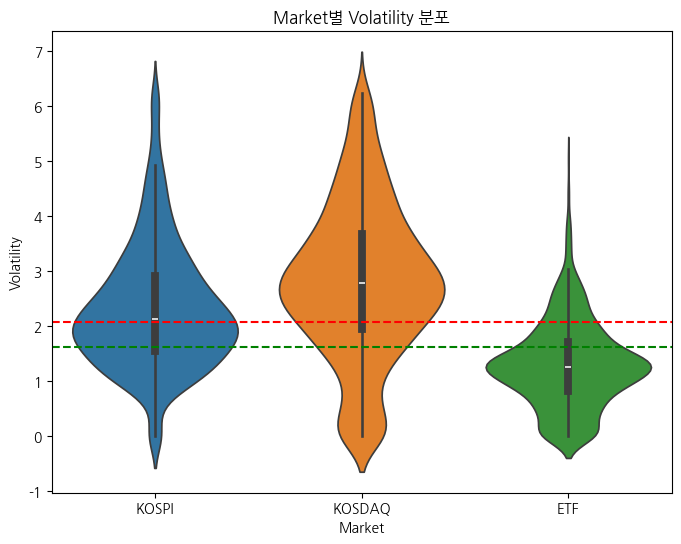

In [82]:
# IQR을 사용하여 이상치 제거
Q1 = result4['Volatility'].quantile(0.25)
Q3 = result4['Volatility'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

kosdaq_25 = result4[result4['market'] == 'KOSDAQ']['Volatility'].quantile(0.25)
kospi_25 = result4[result4['market'] == 'KOSPI']['Volatility'].quantile(0.25)
# kosdaq_50 = result4[result4['market'] == 'KOSDAQ']['Volatility'].quantile(0.50)
# 이상치 제거
result4_cleaned = result4[(result4['Volatility'] <= upper_bound)]

plt.figure(figsize=(8, 6))  # 플롯 크기 설정
sns.violinplot(x='market', y='Volatility', data=result4_cleaned, inner='box', linewidth=1.25, hue='market')

# 수평선 추가
plt.axhline(y=kosdaq_25, color='red', linestyle='--', label='kosdaq_25')
plt.axhline(y=kospi_25, color='green', linestyle='--', label='kospi_25')
# plt.axhline(y=kosdaq_50, color='blue', linestyle='--', label='kosdaq_50')
# 제목 설정
plt.title('Market별 Volatility 분포')
plt.xlabel('Market')
plt.ylabel('Volatility')

# 플롯 보여주기
plt.show()

해석 :  같은리스크 1이라도 이렇게 차이가 있다 이정도  
       같은1단계라도 이렇게 구간 간의 차이는 있다. 
       해놓은데로 하고 고지를 한다 -> 편한방법